In [6]:
import qutip as qt
import matplotlib.pyplot as plt
import h5py
import numpy as np
from data_gen import read_data

In [4]:
(100*100*8 / 1e06)

0.08

In [30]:
i = 2
states, H = read_data("data.hdf5", 2, "train", i, i+1)
H0 = H[0,0]
psi0 = states[0,0]
psi0, H0


(array([-0.80189598+0.45985693j,  0.23866662-0.29754451j]),
 array([[ 0.35613483+0.j        , -0.484249  -0.34448281j],
        [-0.484249  +0.34448281j,  0.        +0.j        ]]))

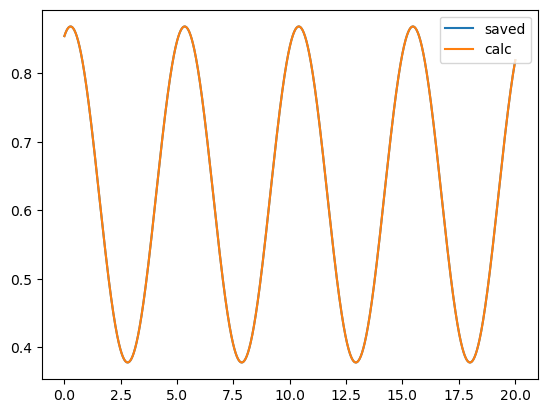

In [32]:
prob0 = np.abs(states[0,:,0])**2
t_end=20
dt = 0.01
t_list = np.arange(0, t_end+dt, dt)
states_calc = qt.sesolve(qt.Qobj(H0), qt.Qobj(psi0), tlist=np.arange(0, t_end+dt, dt))
prob0_calc = [np.abs(s[0][0][0])**2 for s in states_calc.states]
plt.plot(t_list, prob0, label="saved")
plt.plot(t_list, prob0_calc, label="calc")
plt.legend()

In [33]:
t_list.shape

(2002,)